The following variables control which aspect of the data we want to analyze; either "accuracy", "time", or "effort". 

In [15]:
analysis_type = "time"
aggregation = "median"

tasks = ["T1", "T2", 'T3', "T4", "T5", "T6"]

Necessary packages

In [16]:
import pandas as pd 
import numpy as np 
import pylab as plt
import json 

Load in the data and set up some formatting

In [17]:
with open("CHI-format.json", 'r') as fdata:
    data = json.load(fdata)
data[0]["E"]['e']["T1"]
data = [d for i,d in enumerate(data) if i != 28]

In [18]:
def compute_aggregation(values):
    if not values: return None
    if aggregation == "mean":
        return sum(values) / len(values)
    elif aggregation == "median":
        from statistics import median
        return median(values)
    
def flatten(nested):
    return [x for xs in nested for x in xs]

Data format: 
```
[
    {
        'E': {
            'e': {
                'T1': {
                    'accuracy': [0,1,0],
                    'time': [2.3, 2.7, 4.91],
                    'effort': [3, 5, 9]
                }, 
                ...
            }, 
            ...
        }, 
        ...
    }, 
    ...
]
```
Each entry is a participant, their responses partitioned by geometry, graph type, and task type. 

In [19]:
factors = list()
geoms = list("EHS")
gtypes = list("ehs")
for i,participant in enumerate(data):
    for t in tasks:
        for geom in geoms:
            aggregatelist = flatten([participant[geom][gtype][t][analysis_type] for gtype in gtypes])
            factors.append([compute_aggregation(aggregatelist), f'p_{i}', f'{t}_{geom}'])

# h1 = pd.DataFrame([factor for factor in factors if 'e_' in factor[2]], columns=["values", 'participants', "groups"])
# h1.to_csv(f"CHI-hypotheses/H1a-{analysis_type}.csv", index=False)
# h2 = pd.DataFrame([factor for factor in factors if 'h_' in factor[2]], columns=["values", 'participants', "groups"])
# h2.to_csv(f"CHI-hypotheses/H1b-{analysis_type}.csv", index=False)
# h3 = pd.DataFrame([factor for factor in factors if 's_' in factor[2]], columns=["values", 'participants', "groups"])
# h3.to_csv(f"CHI-hypotheses/H1c-{analysis_type}.csv", index=False)
factors = [f for f in factors if f[0]]


T = pd.DataFrame(factors,columns=['values', 'participants', 'groups'])
T.to_csv(f"CHI-hypotheses/H3-{analysis_type}.csv",index=False)

In [20]:
T

,values,participants,groups
0,15.377,p_0,T1_E
1,18.889,p_0,T1_H
2,20.034,p_0,T1_S
3,7.979,p_0,T3_E
4,19.986,p_0,T3_H
...,...,...,...
181,8.550,p_30,T4_H
182,20.953,p_30,T4_S
183,47.536,p_30,T6_E
184,33.589,p_30,T6_H


In [21]:
results = dict()
for t in tasks:
    for geom in "EHS":
    # results[f'{gtype}({geom})'] = [compute_aggregation(p[geom][gtype][t][analysis_type]) for p in data for t in tasks]
        intermediate = list()
        for p in data:
            tmp = [p[geom][gtype][t][analysis_type] for gtype in gtypes if p[geom][gtype][t][analysis_type]]
            tmp = compute_aggregation(flatten(tmp))
            if tmp: intermediate.append(tmp)
        results[f'{t}_{geom}'] = intermediate
        # results[f'{gtype}({geom})'] = [p for p in results[f'{gtype}({geom})'] if p]
        # print(results[f'{gtype}({geom})'])

In [22]:
results['T1_E'][:5]

[15.377, 31.938, 15.801, 15.02, 30.811]

In [23]:
dataframes = [pd.DataFrame({key: results[key]}) for key in results.keys()]
pd.concat(dataframes,axis=1)

,T1_E,T1_H,T1_S,T2_E,T2_H,T2_S,T3_E,T3_H,T3_S,T4_E,T4_H,T4_S,T5_E,T5_H,T5_S,T6_E,T6_H,T6_S
0,15.377,18.889,20.034,15.893,10.145,12.785,7.979,19.986,14.309,22.614,25.969,7.544,17.740,20.243,15.950,14.101,34.594,8.953
1,31.938,33.680,25.702,15.909,11.937,9.205,24.773,16.677,12.862,31.140,16.478,26.358,20.156,24.981,21.120,64.662,39.935,35.768
2,15.801,17.397,16.547,8.819,23.858,10.952,11.513,10.943,12.844,11.876,10.043,12.356,15.778,42.354,15.372,10.866,40.863,17.744
3,15.020,17.838,40.675,8.197,17.467,14.017,13.673,17.547,23.590,18.834,26.743,45.381,21.117,43.686,21.002,22.047,28.762,30.709
4,30.811,34.463,24.738,7.893,15.998,7.924,20.235,43.901,21.880,6.668,8.549,12.516,13.872,34.409,14.813,13.275,27.489,50.239
5,15.332,18.464,16.691,13.834,23.512,11.211,11.463,12.332,12.693,20.995,8.550,20.953,20.068,85.336,22.088,47.536,33.589,42.381
6,17.484,24.244,16.004,17.876,24.079,15.174,17.902,10.049,15.531,NaN,NaN,NaN,18.894,49.272,19.084,NaN,NaN,NaN
7,38.972,66.482,65.209,16.354,15.054,17.536,42.386,51.036,59.908,NaN,NaN,NaN,46.818,27.001,27.938,NaN,NaN,NaN
8,34.658,39.353,29.505,14.621,11.151,14.037,12.862,16.290,22.617,NaN,NaN,NaN,26.103,23.874,16.935,NaN,NaN,NaN
9,35.700,23.200,16.284,11.390,16.743,11.628,26.184,29.867,14.250,NaN,NaN,NaN,12.044,31.551,15.688,NaN,NaN,NaN


In [24]:
import scipy.stats as st


In [25]:
labels = list()
means = list()
for t in tasks:
    for geom in "EHS":
        lab = f"{t}_{geom}"
        labels.append(lab)
        mean = compute_aggregation(results[lab])
        CI = st.t.interval(confidence=0.95, df=len(results[lab])-1, loc=mean, scale=st.sem(results[lab]))
        means.append( (mean, CI[0], CI[1], results[lab]) )
means = means[::-1]
labels = labels[::-1]

In [26]:
import ptitprince as pt

In [27]:
# plt.rcParams.update({'font.size': 12})

# for j in range(0,len(means),3):

#     task_means = means[j:j+3]
#     task_labels = labels[j:j+3]

#     colors = ["tab:blue", "tab:orange", "tab:green"][::-1]
#     fig, ax = plt.subplots()
#     error_plots = list()
#     for i,(mean, low, high,values) in enumerate(task_means):
#         y = i/10 
#         sd = 1 / 30
#         scaterY = np.random.uniform(y-sd, y + sd,size=len(values))
#         # ax.scatter(values, scaterY,c=colors[i%3],alpha=0.2)
#         err = ax.errorbar(mean, [i/10], xerr=[abs(high - mean)], fmt='o',color=colors[i%3])
#         error_plots.append(err)
        

#     xmin = 0.0
#     # xmax = max(task_means, key=lambda x: x[2])[2] 
#     xmax = 70
#     ax.set_xlim(xmin, xmax)
#     # ax.legend(error_plots[::-1],["E", "H", "S"],loc="upper left")

#     ax.set_yticks([i / 10 for i in range(3)], labels=[labels[j], labels[j+1], labels[j+2]])
#     ax.set_ylim(-0.05, 2/10 + 0.055)
#     # ax.hlines([0-0.05, 0.25, (5/10 + 0.05), 8/10 + 0.05], xmin, xmax, colors="black")
#     ax.grid(True,axis='x',linestyle='--')

#     # ax.axhspan(-0.05,0.25,facecolor="grey",alpha=0.2)
#     # ax.axhspan(0.25, 0.55,facecolor="grey",alpha=0.2)
#     # ax.axhspan(0.55,0.85, facecolor='grey', alpha=0.2)


#     ax.set_xlabel(analysis_type)
#     ax.set_ylabel("Condition")
#     ax.set_title(f"CI for {aggregation} {analysis_type} RQ1")

#     # ax2 = ax.twinx()
#     # ax2.set_ylim(-0.05, 8/10 + 0.055)
#     # ax2.set_yticks([i / 10 for i in range(1,9,3)], ["H1c", "H1b", "H1a"])

#     fig.set_size_inches(5,2.3)
#     # ax2 = ax.twinx()
#     # ax2.set_ylim(-0.05, 8/10 + 0.055)
#     # ax2.set_yticks([i / 10 for i in range(1,9,3)], ["H1c", "H1b", "H1a"])

#     # fig.set_size_inches(10,5)
#     # fig.savefig(f"figures/RQ1vis_{analysis_type}.pdf")

#     fig,ax = plt.subplots()
#     H = T.loc[T['groups'].isin(task_labels)]
#     pt.half_violinplot(x='values',y='groups',data=H,inner=None,width=1,ax=ax)
#     # pt.half_violinplot(x='values',y='groups',data=h2,inner=None,width=1,ax=axes[1])
#     # pt.half_violinplot(x='values',y='groups',data=h3,inner=None,width=1,ax=axes[2])

#     minx = np.min(H['values'])
#     maxx = np.max(H['values'])
#     for i, group in enumerate(task_labels):
#         data = H[H['groups'] == group]
#         y = (i%3) + np.random.uniform(high=0.2, size=len(data))
#         x = data['values']


#         ax.set_xlim(minx-0.1,maxx+0.1)
#         ax.set_ylabel('')
#         ax.set_xlabel('')
#         ax.scatter(x,y,alpha=0.6)    

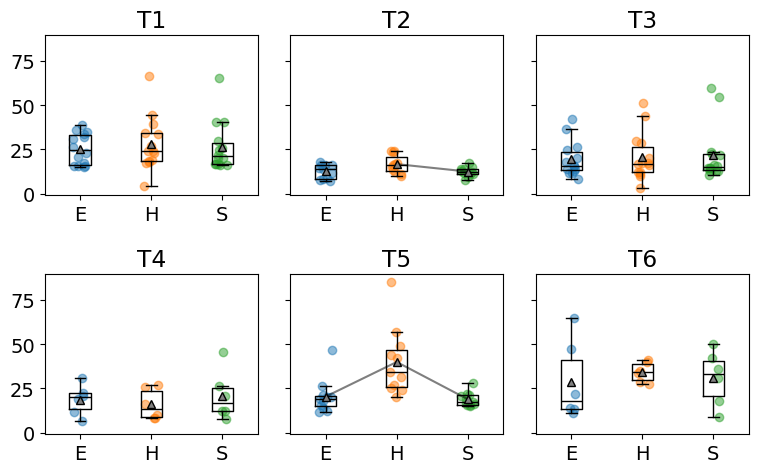

In [38]:
groups = [
    [f"{t}_{g}" for g in "EHS"] for t in tasks
]
plt.rcParams.update({'font.size': 14})
groups
fig,axes = plt.subplots(2,3,sharey=True)
fig.set_dpi(100)
for ax, (v1,v2,v3) in zip(axes.flatten(),groups):
    offsets = [1,2,3]
    ax.scatter(np.random.uniform(offsets[0]-0.1, offsets[0]+0.1,size=len(results[v1])), results[v1],alpha=0.5)
    ax.scatter(np.random.uniform(offsets[1]-0.1, offsets[1]+0.1,size=len(results[v1])), results[v2],alpha=0.5)
    ax.scatter(np.random.uniform(offsets[2]-0.1, offsets[2]+0.1,size=len(results[v1])), results[v3],alpha=0.5)

    D = np.array([results[v1], results[v2], results[v3]]).T
    labs = [v.split("_")[1] for v in [v1,v2,v3]]
    boxplot = ax.boxplot(D, labels=labs,showfliers=False,medianprops={"color": "black"},showmeans=True,meanprops={"markerfacecolor":"grey", 'markeredgecolor': "black"})
    ax.set_title(v1.split("_")[0])
    # ax.set_ylim(0,60)

    if v1 == "T2_E":
        bmeans = boxplot['means']
        p1 = bmeans[1]
        p2 = bmeans[2]
        # p3 = bmeans[2]
        ax.plot([p1.get_xdata(), p2.get_xdata()], [p1.get_ydata(), p2.get_ydata()], alpha=0.5,color='black') 
        # ax.plot([p1.get_xdata(), p3.get_xdata()], [p1.get_ydata(), p3.get_ydata()], alpha=0.5,color='black') 


    if v1 == "T5_E":
        bmeans = boxplot['means']
        p1 = bmeans[1]
        p2 = bmeans[0]
        p3 = bmeans[2]
        ax.plot([p1.get_xdata(), p2.get_xdata()], [p1.get_ydata(), p2.get_ydata()], alpha=0.5,color='black') 
        ax.plot([p1.get_xdata(), p3.get_xdata()], [p1.get_ydata(), p3.get_ydata()], alpha=0.5,color='black') 

# fig.suptitle("Time by task")
fig.tight_layout()
fig.set_size_inches(8,5)
fig.savefig(f"figures/RQ3_{analysis_type}.pdf",bbox_inches='tight')

In [29]:
full_factors = T
full_factors

,values,participants,groups
0,15.377,p_0,T1_E
1,18.889,p_0,T1_H
2,20.034,p_0,T1_S
3,7.979,p_0,T3_E
4,19.986,p_0,T3_H
...,...,...,...
181,8.550,p_30,T4_H
182,20.953,p_30,T4_S
183,47.536,p_30,T6_E
184,33.589,p_30,T6_H


In [30]:
import ptitprince as pt

<Axes: xlabel='groups', ylabel='values'>

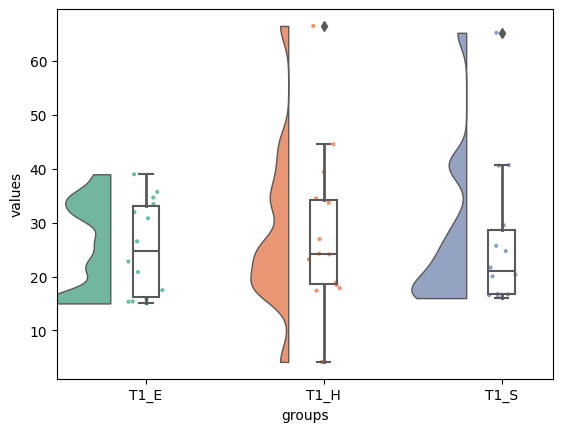

In [31]:
pt.RainCloud(x='groups',y='values',data=full_factors.loc[full_factors['groups'].str.contains("T1")],bw=0.2,cut=0,orient='v',)

In [32]:


wilcox = dict()
for g in groups:
    for g1 in g: 
        wilcox[g1] = dict()
        for g2 in g: 
            if g1 == g2:
                wilcox[g1][g2] = 0
                continue
            x = results[g1]
            y = results[g2]
            wilcox[g1][g2] = st.wilcoxon(x,y)[1]

# wilcoxdf = pd.DataFrame(wilcox)


In [33]:
for key,item in wilcox.items():
    print(key, item)

T1_E {'T1_E': 0, 'T1_H': 0.2412109375, 'T1_S': 0.8077392578125}
T1_H {'T1_E': 0.2412109375, 'T1_H': 0, 'T1_S': 0.153076171875}
T1_S {'T1_E': 0.8077392578125, 'T1_H': 0.153076171875, 'T1_S': 0}
T2_E {'T2_E': 0, 'T2_H': 0.0537109375, 'T2_S': 0.8984375}
T2_H {'T2_E': 0.0537109375, 'T2_H': 0, 'T2_S': 0.0419921875}
T2_S {'T2_E': 0.8984375, 'T2_H': 0.0419921875, 'T2_S': 0}
T3_E {'T3_E': 0, 'T3_H': 0.6697998046875, 'T3_S': 0.3909912109375}
T3_H {'T3_E': 0.6697998046875, 'T3_H': 0, 'T3_S': 0.625732421875}
T3_S {'T3_E': 0.3909912109375, 'T3_H': 0.625732421875, 'T3_S': 0}
T4_E {'T4_E': 0, 'T4_H': 0.84375, 'T4_S': 0.84375}
T4_H {'T4_E': 0.84375, 'T4_H': 0, 'T4_S': 0.3125}
T4_S {'T4_E': 0.84375, 'T4_H': 0.3125, 'T4_S': 0}
T5_E {'T5_E': 0, 'T5_H': 0.013671875, 'T5_S': 0.8984375}
T5_H {'T5_E': 0.013671875, 'T5_H': 0, 'T5_S': 0.001953125}
T5_S {'T5_E': 0.8984375, 'T5_H': 0.001953125, 'T5_S': 0}
T6_E {'T6_E': 0, 'T6_H': 0.5625, 'T6_S': 0.6875}
T6_H {'T6_E': 0.5625, 'T6_H': 0, 'T6_S': 0.6875}
T6_S {'T6